<center> <h1> <b><span style="color:red"> 
Predictive Analysis <br><br>
Lab 1<br><br>
Linear Regression</span></b></h1>
    

<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h4>Setup</h4>

 Import libraries

In [1]:
import pandas as pd
import numpy as np

load data and store in dataframe df:

In [19]:
# path of data 
path = 'Automobile_Data.csv'  # I changed the file name
df = pd.read_csv(path)

# cleaning the data here
#  replacing '?' to None value
df.replace('?', np.nan, inplace=True)
#  change dtype
df[['engine-size', 'price']] = df[['engine-size', 'price']].astype(float)
#  filling None value by mean of the following three columns
cols = ['highway-mpg', 'engine-size', 'price']
df[cols] = df[cols].fillna(df[cols].mean())

# showing df
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h4>Lets load the modules for linear regression</h4>

In [21]:
# install packages if needed
# pip install scikit-learn

from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [22]:
lm = LinearRegression()
lm

LinearRegression()

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [23]:
# install library to split the data
from sklearn.model_selection import train_test_split

# define both predictor(X) and response(Y) variable
X = df[['highway-mpg']]
Y = df['price']

# spliting df into train(70%) and test(30%) data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Fit the linear model using highway-mpg.

In [24]:
lm.fit(X_train, Y_train)

LinearRegression()

 We can output a prediction 

In [25]:
Yhat=lm.predict(X_test)
Yhat[0:5]

array([21004.52155975, 21004.52155975,  9910.74013785, 15457.6308488 ,
       18231.07620428])

<h4>What is the value of the intercept (a)?</h4>

In [26]:
lm.intercept_

41343.12083323383

<h4>What is the value of the Slope (b)?</h4>

In [27]:
lm.coef_

array([-924.48178516])

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>price</b> = 41343.12 - 924.48 x  <b>highway-mpg</b>

<h4>Evaluate the Model</h4>

In [51]:
# get residuals (actual y - predicted y) if X is highway_mpg(HM)
residuals_HM = [int(y_d) - y_m for y_d, y_m in zip(Y_test, Yhat)]

# get sum of squared differences
sse_HM = sum([res**2 for res in residuals_HM])
print('Sum of the Squared Difference when Predictor Variable is "highway-mpg(HM)":')
print(sse_HM)

print(
"""
Comments:
- SSE was significantly high so that we cannot conclude that the variable "highway-mpg" is a good indicator to predict "price".
"""
)

Sum of the Squared Difference when Predictor Variable is "highway-mpg(HM)":
3146426005.7541556

Comments:
- SSE was significantly high so that we cannot conclude that the variable "highway-mpg" is a good indicator to predict "price".




Comments:
- Considering that all predicted variables are on the regression line, 
   there are huge gaps between those predicted variables and actual varialbes shown as red points on the plot.
- We can find that both "highway-mpg" and "price" are negatively correlated to each other; the higher highway-mpg, the lower prices.
- However, it's difficult to conclude that their relationship can be explained by a straight line; a regression curve might be better.



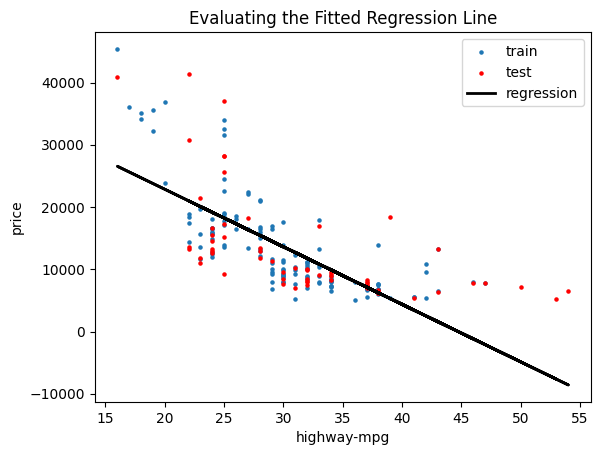

In [50]:
# evaluating data by visualization
import matplotlib.pyplot as plt

# showing training variables in scatter
plt.scatter(X_train, Y_train, label='train', s=5)
plt.scatter(X_test, Y_test, label='test', s=5, color='red')
plt.plot(X_test, Yhat, color='black', linewidth=2, label='regression')

plt.title('Evaluating the Fitted Regression Line')
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.legend()

print(
"""
Comments:
- Considering that all predicted variables are on the regression line, 
   there are huge gaps between those predicted variables and actual varialbes shown as red points on the plot.
- We can find that both "highway-mpg" and "price" are negatively correlated to each other; the higher highway-mpg, the lower prices.
- However, it's difficult to conclude that their relationship can be explained by a straight line; a regression curve might be better.
"""
)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object?</b>
</div>

In [34]:
# create a new linear regression object
lm1=LinearRegression()
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?</b>
</div>

In [41]:
# define both predictor(X) and response(Y) variable
X1 = df[['engine-size']]
Y1 = df['price']

# spliting df into train(70%) and test(30%) data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# fitting those data into the model
lm1.fit(X1_train, Y1_train)

# getting the predicted variables
yhat1=lm1.predict(X1_test)
yhat1[0:5]

array([26383.7196172 , 13946.84018773, 12192.92129383, 12352.368466  ,
       22238.09314071])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model?</b>
</div>

<h4>Slope</h4>

In [42]:
# get the slope 
lm1.coef_

array([159.44717217])

<h4>Intercept</h4>

In [43]:
# Write your code below and press Shift+Enter to execute 
lm1.intercept_

-6940.739366901093

Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Slope 
lm1.coef_
# Intercept
lm1.intercept_

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?</b>
</div>

# You can type you answer here


<b>price</b> = -6940.74 - 159.45 x engine-size<b></b>

Double-click <b>here</b> for the solution.

<!-- The answer is below:

# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

-->

In [52]:
# get residuals (actual y - predicted y) if X is engine-size (ES)
residuals_ES = [int(y_d) - y_m for y_d, y_m in zip(Y1_test, yhat1)]

# get sum of squared differences
sse_ES = sum([res**2 for res in residuals_ES])
print('Sum of the Squared Difference when Predictor Variable is "engine-size(ES)":')
print(sse_ES)

print(
"""
Comments:
- SSE was still high so that we cannot conclude that the variable "engine-size" is a good indicator to predict "price".
- However, Its SSE lower than the model whose predictor variable (X) is "highway-mpg", which was around 3146426005.
- Therefore, compared to the model with a predictor variable "highway-mpg", the model with a predictor variable "engine-mpg" shows better performance.
"""
)

Sum of the Squared Difference when Predictor Variable is "engine-size(ES)":
1084562852.7684422

Comments:
- SSE was still high so that we cannot conclude that the variable "engine-size" is a good indicator to predict "price".
- However, Its SSE lower than the model whose predictor variable (X) is "highway-mpg", which was around 3146426005.
- Therefore, compared to the model with a predictor variable "highway-mpg", the model with a predictor variable "engine-mpg" shows better performance.




Cooments:
- First of all, two variable "engine-size" and "price" are positively correlated; the higher engine-size, the higher prices.
- If we focus more on each data point, the relationship between those variables can be explained by a linear model, rather than non-linar.
- Although a regression line might gradually deteriorate the ability to predict "price" as "engine-size" is higher, 
   we can see that a line predicts the broad trend of expected prices.



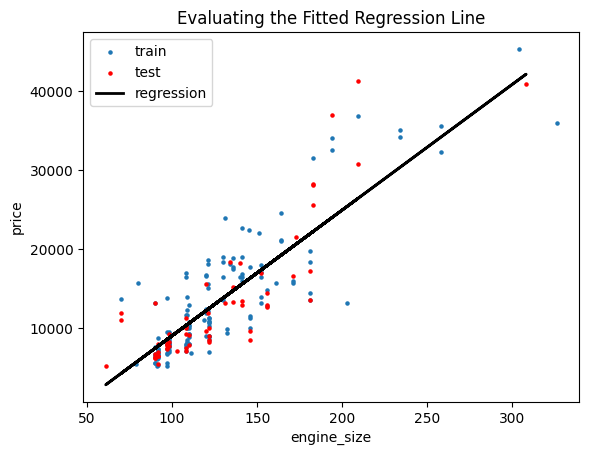

In [53]:
# evaluating data by visualization
import matplotlib.pyplot as plt

# showing training variables in scatter
plt.scatter(X1_train, Y1_train, label='train', s=5)
plt.scatter(X1_test, Y1_test, label='test', s=5, color='red')
plt.plot(X1_test, yhat1, color='black', linewidth=2, label='regression')

plt.title('Evaluating the Fitted Regression Line')
plt.xlabel('engine_size')
plt.ylabel('price')
plt.legend()

print(
"""
Cooments:
- First of all, two variable "engine-size" and "price" are positively correlated; the higher engine-size, the higher prices.
- If we focus more on each data point, the relationship between those variables can be explained by a linear model, rather than non-linar.
- Although a regression line might gradually deteriorate the ability to predict "price" as "engine-size" is higher, 
   we can see that a line predicts the broad trend of expected prices.
"""
)